# 多元分类
## 激活函数-Softmax
单个分类：$\pi_l=\frac{e^\eta l}{\sum_{j=1}^k{e^\eta l}}$

所有分类的和: ${\sum_{i=1}^k}\pi_i=1$

In [1]:
import torch
from torch import nn, optim # 神经网络+优化函数
import matplotlib.pyplot as plt
from time import perf_counter

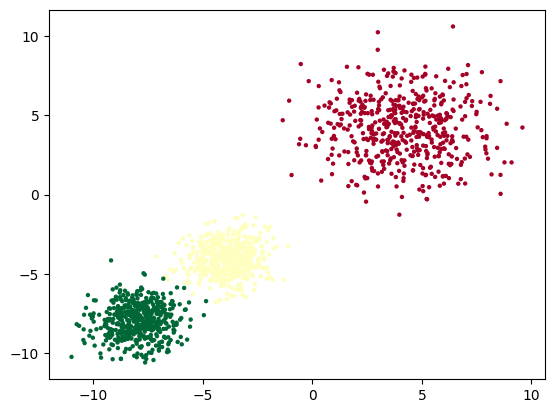

In [2]:
cluster = torch.ones(500,2)
data0 = torch.normal(cluster*4, 2)
data1 = torch.normal(cluster*-4, 1)
data2 = torch.normal(cluster*-8, 1)
label0 = torch.zeros(500)
label1 = torch.ones(500)
label2 = label1*2

x = torch.cat((data0,data1,data2)).type(torch.FloatTensor)
y = torch.cat((label0,label1,label2)).type(torch.LongTensor)

plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=10, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
class Net(nn.Module):
    def __init__(self, input_features, num_hidden, outputs, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.hidden = nn.Linear(input_features, num_hidden)
        self.out = nn.Linear(num_hidden, outputs)

    def forward(self, x):
        x = self.hidden(x) # inputs->hidden layer #0
        x = torch.relu(x) # activate function
        x = self.out(x) # hidden layer #0 -> outputs

        ## softmax(inputs, dim) dim=0,行归一化 dim=1,列归一化
        x = torch.softmax(x, 1) # softmax function 使数据转换为(0,1)之间的数 总和为1
        return x

In [4]:
net = Net(input_features=2, num_hidden=20, outputs=3) # 二维输入数据 隐藏层20个神经元 分为3类
inputs = x
target = y
if torch.cuda.is_available():
    net = net.cuda()
    inputs = inputs.cuda()
    target = target.cuda()

optimizer = optim.SGD(net.parameters(), lr=0.02)
criterion = nn.CrossEntropyLoss()

In [5]:
def draw(output):
    plt.cla()
    output = torch.max((output), 1)[1]
    pred_y = output.data.numpy().squeeze()
    target_y = y.numpy()
    plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=pred_y, s=10, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y)/1500.0
    plt.text(1.5, -4, f'Accuracy={accuracy}', fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.1)

def train(inputs, target, model, criterion, optimizer, epochs):
    output = None
    loss = None
    for epoch in range(epochs):
        output = model(inputs)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if output is not None and loss is not None:
        draw(output.cpu())
    return model, loss

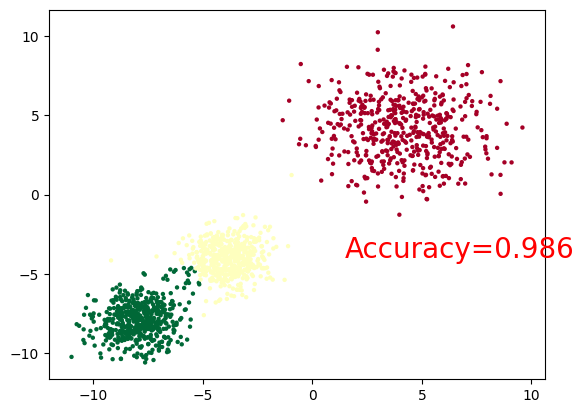

In [6]:
model, loss = train(inputs, target, net, criterion, optimizer, 1000)